In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/mymoviedb.csv",lineterminator='\n')


# Release_Date configare

In [3]:
df['Release_Date']= pd.to_datetime(df['Release_Date'])

In [4]:
df['Release_Date']=df['Release_Date'].dt.year

# drop cloumn  

In [5]:
df.drop(axis=1,columns='Overview',inplace=True)

In [6]:
df.drop('Poster_Url',axis=1,inplace=True)

In [7]:
df.drop("Original_Language",axis=1,inplace=True)

# Genre configured 

In [8]:
df['Genre']=df['Genre'].str.split(', ')
df= df.explode("Genre").reset_index(drop=True)

# vote avarage range fix 

In [9]:
def catagorey_col(df,col, lavles):
    eg=[df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]
    df[col]=pd.cut(df[col],eg,labels=lavles,duplicates='drop')
    return df

In [10]:
lavles= ['not_propular','below_avg','average','propular']

In [11]:
catagorey_col(df,'Vote_Average',lavles)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,propular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,propular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,propular,Science Fiction
3,2022,The Batman,3827.658,1151,propular,Crime
4,2022,The Batman,3827.658,1151,propular,Mystery
...,...,...,...,...,...,...
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,propular,War
25791,1984,Threads,13.354,186,propular,Drama


In [12]:
df.dropna(inplace=True)

# Genre type category  fix 

In [13]:
df['Genre']=df['Genre'].astype('category')

# Data vizulasise

In [14]:
sns.set_style('dark')

# What is the most frequent genre of movies released on Netflix?

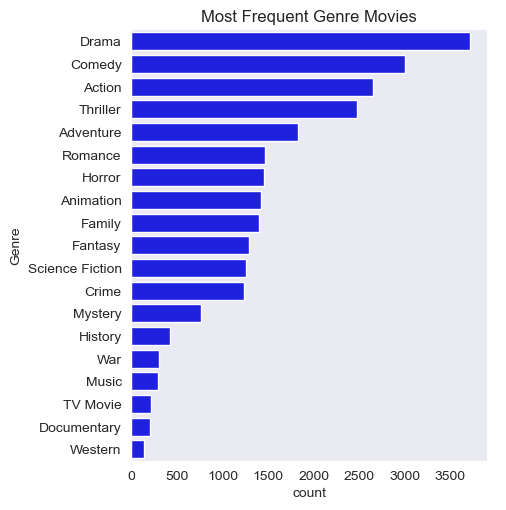

In [15]:
sns.catplot(data=df,y='Genre',kind='count',
           order= df['Genre'].value_counts().index,
           color='blue')
plt.title("Most Frequent Genre Movies")
plt.show()

# Which has highest votes in vote avg column?

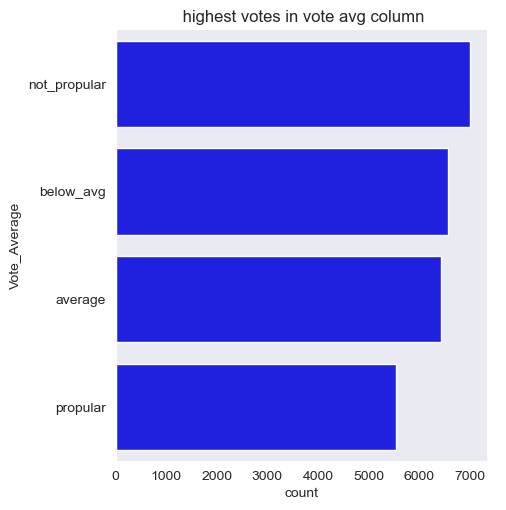

In [16]:
sns.catplot(data=df,y='Vote_Average',kind='count',order=df['Vote_Average'].value_counts().index,color='blue')
plt.title(" highest votes in vote avg column")
plt.show()

# What movie got the highest popularity? what's its genre?

In [17]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,propular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,propular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,propular,Science Fiction


# What movie got the lowest popularity? what's its genre?

In [18]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,propular,War
25791,1984,Threads,13.354,186,propular,Drama
25792,1984,Threads,13.354,186,propular,Science Fiction


# Which year has the most filmmed movies?

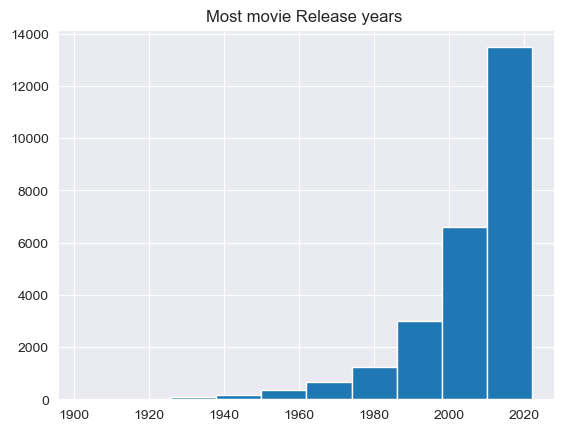

In [19]:
df['Release_Date'].hist()
plt.title("Most movie Release years ")
plt.show()